The analysis of this project is based on the 2017-2018 NBA season. I'm going to take a look at the teams with the most three-point percentages made that season, the top 5 scorers of that season,  and take a closer look at the top scorer stats. 

In [1]:
NBA_datafile = "NBA Dataset.csv"

In [2]:
import pandas as pd
import numpy as np

# Reading the CSV file

In [3]:
#Fetching for the csv file
data = pd.read_csv(NBA_datafile)
data.head(5)

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TOr,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,1,Aaron Brooks,Min,PG,33,2,1.4,2.8,63.7,0.000,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN
1,2,Aaron Jackson,Hou,F,31,7,2.4,5.1,17.8,0.291,...,0.6,13.1,0.3,17.2,0.00,0.00,0.29,8.4,NaN,NaN
2,3,Abdel Nader,Bos,SF,24,11,3.0,6.3,25.5,0.107,...,0.3,5.0,0.3,14.3,0.09,0.09,0.18,6.2,NaN,NaN
3,4,Al Horford,Bos,C,31,19,35.7,74.4,17.8,0.119,...,8.3,12.8,3.3,14.9,1.00,1.16,1.68,8.5,112.7,102.7
4,5,Alec Burks,Uta,SG,26,9,13.4,27.9,28.9,0.103,...,2.7,11.2,1.9,25.9,0.44,0.11,0.89,10.7,110.0,101.1


# New Dataframe

Created a new dataframe to collect the team and 3p% column. I'm going to look at the teams with the highest three-point percentages.

In [4]:
# use filter which will create a new copy by default
new = data.filter(['TEAM','3P%'], axis=1)

In [5]:
#sort the recurring states & checkins
sorted = new.sort_values(by=['TEAM', '3P%'])

# Horizonatal Bar Chart

Create a horizontal bar chart to display the teams with the most three-pointers made 

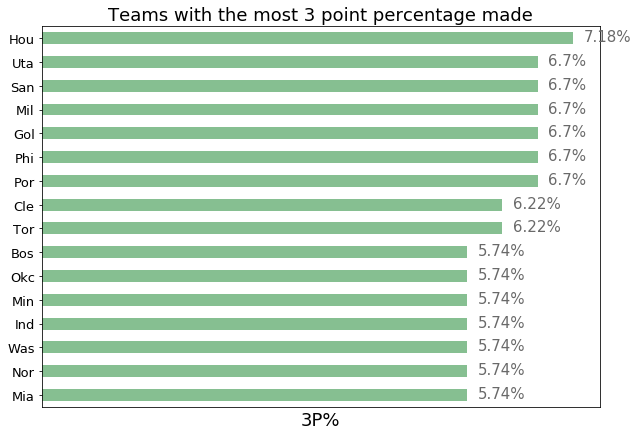

In [7]:
ax = sorted['TEAM'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="#86bf91", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Teams with the most 3 point percentage made", fontsize=18)
ax.set_xlabel("3P%", fontsize=18);
ax.set_xticks([])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

Next, I want to know the top scorers of that season so I've created another dataframe to collect the names of the players, the position they play, and the total points they score per game.

In [8]:
players = data[['FULL NAME','POS','PPG']]
players.head(5)

,FULL NAME,POS,PPG
0,Aaron Brooks,PG,2.0
1,Aaron Jackson,F,0.7
2,Abdel Nader,SF,1.1
3,Al Horford,C,15.7
4,Alec Burks,SG,9.1


I've sorted the dataframe by name from highest to lowest

In [9]:
# sorting data frame by name 
players.sort_values("PPG", ascending = False, inplace = True, na_position ='last') 
  
# display 
players.head(10)

/Users/lasanajabbi/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FULL NAME,POS,PPG
126,LeBron James,SF,34.0
11,Anthony Davis,PF,30.1
171,Russell Westbrook,PG,29.3
115,Kevin Durant,SF,29.0
79,James Harden,PG,28.6
98,John Wall,PG,26.0
65,Giannis Antetokounmpo,PF,25.7
180,Stephen Curry,PG,25.5
26,CJ McCollum,SG,25.3
118,Khris Middleton,PF,24.7


# Plot Another Horizontal Bar Chart of Top Scorers

*Note: I was trying to get the names of the players to show instead of the index, so if you have any suggestions it would be greatly appreciated

Text(0, 0.5, 'FULL NAME')

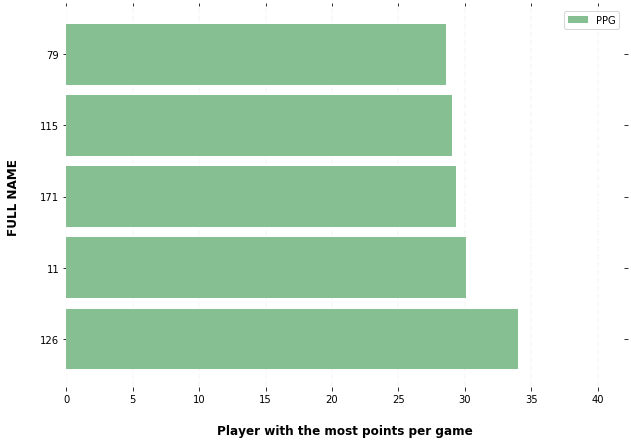

In [10]:
ax = players.sort_values("PPG", axis = 0, ascending = False)[:5].plot(kind='barh', figsize=(10, 7), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Player with the most points per game", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("FULL NAME", labelpad=20, weight='bold', size=12)

Now, I'm going to take a closer look at the stats of the top scorer which is LeBron James.

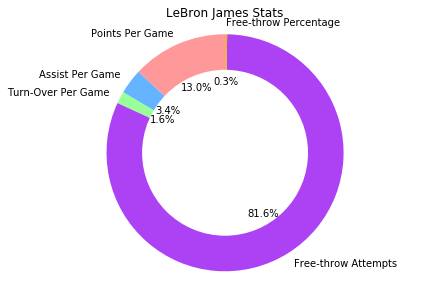

In [12]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Points Per Game', 'Assist Per Game', 'Turn-Over Per Game', 'Free-throw Attempts', 'Free-throw Percentage']
sizes = [34, 9, 4.27, 213, 0.746]
#colors
colors = ['#ff9999','#66b3ff','#99ff99', '#ad42f4', '#f4a941']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('LeBron James Stats')
plt.show()